In [73]:
# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import talib

In [74]:


data_path = 'data/Kraken_OHLCVT'
# full_path = data_path + table
# df = pd.read_csv(full_path, header=None)
# df

In [75]:
import os

file_names = os.listdir(data_path)

btc = [f for f in file_names if "BTC" in f]
# eth = [f for f in file_names if "ETH" in f.upper()]
# sol = [f for f in file_names if "SOL" in f.upper()]

In [76]:
df = pd.read_csv(data_path + "/XBTUSDC_1.csv", header=None)
# df["timestamp"] = pd.to_datetime(df[0], unit='s') 
# X = df[[4, 'timestamp']]
# X = df[[0, 4]]
df = df.drop(columns=[6])
x = df.to_numpy()

# Set print options for better readability
np.set_printoptions(precision=2, suppress=True)

# Pretty print the array
print("Formatted NumPy Array:")
print(x)


Formatted NumPy Array:
[[1.58e+09 8.30e+03 8.30e+03 8.30e+03 8.30e+03 2.00e-03]
 [1.58e+09 8.30e+03 8.30e+03 8.30e+03 8.30e+03 4.10e-04]
 [1.58e+09 8.22e+03 8.22e+03 8.22e+03 8.22e+03 9.63e-03]
 ...
 [1.73e+09 6.32e+04 6.32e+04 6.32e+04 6.32e+04 3.10e-03]
 [1.73e+09 6.32e+04 6.32e+04 6.32e+04 6.32e+04 8.00e-04]
 [1.73e+09 6.33e+04 6.33e+04 6.33e+04 6.33e+04 1.00e-04]]


In [77]:
#OVERLAP STUDIES:

def calculate_bollinger_bands(data, time_period=20):
    close = data[:, 4]  # Close prices
    upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], upperband, middleband, lowerband))

def calculate_dema(data, time_period=30):
    close = data[:, 4]  # Close prices
    dema = talib.DEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dema))

def calculate_ema(data, time_period=30):
    close = data[:, 4]  # Close prices
    ema = talib.EMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], ema))

def calculate_hilbert_trendline(data):
    close = data[:, 4]  # Close prices
    h_trendline = talib.HT_TRENDLINE(close)
    return np.column_stack((data[:, 0], h_trendline))

def calculate_kamam(data, time_period=30):
    close = data[:, 4]  # Close prices
    kmam = talib.KAMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], kmam))

def calculate_midpoint(data, time_period=14):
    close = data[:, 4]  # Close prices
    midpoint = talib.MIDPOINT(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], midpoint))

def calculate_midprice(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    midprice = talib.MIDPRICE(high, low, timeperiod=time_period)
    return np.column_stack((data[:, 0], midprice))

def calculate_sar(data, acceleration=0.02, maximum=0.2):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    sar = talib.SAR(high, low, acceleration=acceleration, maximum=maximum)
    return np.column_stack((data[:, 0], sar))

def calculate_sma(data, time_period=30):
    close = data[:, 4]  # Close prices
    sma = talib.SMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], sma))

def calculate_tema(data, time_period=30):
    close = data[:, 4]  # Close prices
    tema = talib.TEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], tema))

def calculate_wma(data, time_period=30):
    close = data[:, 4]  # Close prices
    wma = talib.WMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], wma))

In [78]:
#momentum indicators:
def calculate_adx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adx = talib.ADX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adx))

def calculate_adxr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adxr = talib.ADXR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adxr))

def calculate_apO(data):
    close = data[:, 4] # Close prices
    apo = talib.APO(close)
    return np.column_stack((data[:, 0], apo))

def calculate_aroonosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    aroonosc = talib.AROONOSC(high, low)
    return np.column_stack((data[:, 0], aroonosc))

def calculate_bop(data):
    open_price = data[:, 1]  # Open prices
    high = data[:, 2]        # High prices
    low = data[:, 3]         # Low prices
    close = data[:, 4]       # Close prices
    bop = talib.BOP(open_price, high, low, close)
    return np.column_stack((data[:, 0], bop))

def calculate_cci(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    cci = talib.CCI(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cci))

def calculate_cmo(data, time_period=14):
    close = data[:, 4]  # Close prices
    cmo = talib.CMO(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cmo))

def calculate_dx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    dx = talib.DX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dx))

def calculate_macd(data):
    close = data[:, 4]  # Close prices
    macd, macdsignal, macdhist = talib.MACD(close)
    return np.column_stack((data[:, 0], macd, macdsignal, macdhist))

def calculate_minus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    minus_di = talib.MINUS_DI(high, low, close)
    return np.column_stack((data[:, 0], minus_di))

def calculate_minus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    minus_dm = talib.MINUS_DM(high, low)
    return np.column_stack((data[:, 0], minus_dm))

def calculate_momentum(data, time_period=10):
    close = data[:, 4]  # Close prices
    momentum = talib.MOM(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], momentum))

def calculate_plus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    plus_di = talib.PLUS_DI(high, low, close)
    return np.column_stack((data[:, 0], plus_di))

def calculate_plus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    plus_dm = talib.PLUS_DM(high, low)
    return np.column_stack((data[:, 0], plus_dm))

def calculate_ppo(data):
    close = data[:, 4]  # Close prices
    ppo = talib.PPO(close)
    return np.column_stack((data[:, 0], ppo))

def calculate_roc(data, time_period=10):
    close = data[:, 4]  # Close prices
    roc = talib.ROC(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], roc))

def calculate_rocp(data):
    close = data[:, 4]  # Close prices
    rocp = talib.ROCP(close)
    return np.column_stack((data[:, 0], rocp))

def calculate_rocr(data):
    close = data[:, 4]  # Close prices
    rocr = talib.ROCR(close)
    return np.column_stack((data[:, 0], rocr))

def calculate_rocr100(data):
    close = data[:, 4]  # Close prices
    rocr100 = talib.ROCR100(close)
    return np.column_stack((data[:, 0], rocr100))

def calculate_rsi(data, time_period=14):
    close = data[:, 4]  # Close prices
    rsi = talib.RSI(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], rsi))

def calculate_stochastic(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    slowk, slowd = talib.STOCHF(high, low, close)
    return np.column_stack((data[:, 0], slowk, slowd))

def calculate_trix(data):
    close = data[:, 4]  # Close prices
    trix = talib.TRIX(close)
    return np.column_stack((data[:, 0], trix))

def calculate_ultosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    ultosc = talib.ULTOSC(high, low, close)
    return np.column_stack((data[:, 0], ultosc))

def calculate_willr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    willr = talib.WILLR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], willr))

In [79]:
#volatility indicators:

def calculate_atr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    atr = talib.ATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], atr))

def calculate_natr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    natr = talib.NATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], natr))

def calculate_trange(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    prev_close = np.roll(data[:, 4], 1)  # Previous close prices (shifted)
    prev_close[0] = low[0]  # Handle the first element
    true_range = np.maximum(high - low, np.maximum(np.abs(high - prev_close), np.abs(low - prev_close)))
    return np.column_stack((data[:, 0], true_range))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# atr_result = calculate_atr(data)
# natr_result = calculate_natr(data)
# trange_result = calculate_trange(data)


In [80]:
# PATTERN RECOGNITION:
import numpy as np
# import talib

def calculate_two_crows(data):
    two_crows = talib.CDL2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], two_crows))

def calculate_three_black_crows(data):
    three_black_crows = talib.CDL3BLACKCROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_black_crows))

def calculate_three_inside(data):
    three_inside = talib.CDL3INSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_inside))

def calculate_three_line_strike(data):
    three_line_strike = talib.CDL3LINESTRIKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_line_strike))

def calculate_three_outside(data):
    three_outside = talib.CDL3OUTSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_outside))

def calculate_three_stars_in_south(data):
    three_stars_in_south = talib.CDL3STARSINSOUTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_stars_in_south))

def calculate_three_advancing_white(data):
    three_advancing_white = talib.CDL3WHITESOLDIERS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_advancing_white))

def calculate_abandoned_baby(data):
    abandoned_baby = talib.DLABANDONEDBABY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], abandoned_baby))

def calculate_advance_block(data):
    advance_block = talib.CDLADVANCEBLOCK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], advance_block))

def calculate_belt_hold(data):
    belt_hold = talib.CDLBELTHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], belt_hold))

def calculate_breakaway(data):
    breakaway = talib.CDLBREAKAWAY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], breakaway))

def calculate_closing_marubozu(data):
    closing_marubozu = talib.CDLCLOSINGMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], closing_marubozu))

def calculate_concealing_baby_swallow(data):
    concealing_baby_swallow = talib.DLCONCEALBABYSWALL(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], concealing_baby_swallow))

def calculate_counterattack(data):
    counterattack = talib.CDLCOUNTERATTACK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], counterattack))

def calculate_dark_cloud_cover(data):
    dark_cloud_cover = talib.CLDARKCLOUDCOVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dark_cloud_cover))

def calculate_doji(data):
    doji = talib.DLDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji))

def calculate_doji_star(data):
    doji_star = talib.CDLDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji_star))

def calculate_dragonfly_doji(data):
    dragonfly_doji = talib.DLDRAGONFLYDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dragonfly_doji))

def calculate_engulfing(data):
    engulfing = talib.DLENGULFING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], engulfing))

def calculate_evening_doji_star(data):
    evening_doji_star = talib.CDLEVENINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_doji_star))

def calculate_evening_star(data):
    evening_star = talib.CDLEVENINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_star))

def calculate_up_down_gap_side(data):
    up_down_gap_side = talib.CDLGAPSIDESIDEWHITE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], up_down_gap_side))

def calculate_gravestone_doji(data):
    gravestone_doji = talib.CDLGRAVESTONEDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], gravestone_doji))

def calculate_hammer(data):
    hammer = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hammer))

def calculate_hanging_man(data):
    hanging_man = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hanging_man))

def calculate_harami(data):
    harami = talib.CDLHARAMI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami))

def calculate_harami_cross(data):
    harami_cross = talib.DLHARAMICROSS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami_cross))

def calculate_high_wave(data):
    high_wave = talib.CDLHIGHWAVE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], high_wave))

def calculate_hikkake(data):
    hikkake = talib.CDLHIKKAKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hikkake))

def calculate_modified_hikkake(data):
    modified_hikkake = talib.CDLHIKKAKEMOD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], modified_hikkake))

def calculate_homing_pigeon(data):
    homing_pigeon = talib.CDLHOMINGPIGEON(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], homing_pigeon))

def calculate_identical_three_crows(data):
    identical_three_crows = talib.CDLIDENTICAL3CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], identical_three_crows))

def calculate_in_neck(data):
    in_neck = talib.CDLINNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], in_neck))

def calculate_inverted_hammer(data):
    inverted_hammer = talib.DLINVERTEDHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], inverted_hammer))

def calculate_kicking(data):
    kicking = talib.DLKICKING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking))

def calculate_kicking_by_length(data):
    kicking_by_length = talib.CDLKICKINGBYLENGTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking_by_length))

def calculate_ladder_bottom(data):
    ladder_bottom = talib.CDLLADDERBOTTOM(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], ladder_bottom))

def calculate_long_legged_doji(data):
    long_legged_doji = talib.CDLLONGLEGGEDDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_legged_doji))

def calculate_long_line(data):
    long_line = talib.CDLLONGLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_line))

def calculate_marubozu(data):
    marubozu = talib.CDLMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], marubozu))

def calculate_matching_low(data):
    matching_low = talib.CDLMATCHINGLOW(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], matching_low))

def calculate_mat_hold(data):
    mat_hold = talib.CDLMATHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], mat_hold))

def calculate_morning_doji_star(data):
    morning_doji_star = talib.CDLMORNINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_doji_star))

def calculate_morning_star(data):
    morning_star = talib.CDLMORNINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_star))

def calculate_on_neck(data):
    on_neck = talib.CDLONNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], on_neck))

def calculate_piercing(data):
    piercing = talib.CDLPIERCING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], piercing))

def calculate_rickshaw_man(data):
    rickshaw_man = talib.DLRICKSHAWMAN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rickshaw_man))

def calculate_rising_falling_three_methods(data):
    rising_falling_three_methods = talib.CDLRISEFALL3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rising_falling_three_methods))

def calculate_separating_lines(data):
    separating_lines = talib.CDLSEPARATINGLINES(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], separating_lines))

def calculate_shooting_star(data):
    shooting_star = talib.CDLSHOOTINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], shooting_star))

def calculate_short_line(data):
    short_line = talib.CDLSHORTLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], short_line))

def calculate_spinning_top(data):
    spinning_top = talib.CDLSPINNINGTOP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], spinning_top))

def calculate_stalled_pattern(data):
    stalled_pattern = talib.CDLSTALLEDPATTERN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stalled_pattern))

def calculate_stick_sandwich(data):
    stick_sandwich = talib.CDLSTICKSANDWICH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stick_sandwich))

def calculate_takuri(data):
    takuri = talib.CDLTAKURI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], takuri))

def calculate_tasuki_gap(data):
    tasuki_gap = talib.CDLTASUKIGAP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tasuki_gap))

def calculate_thrusting(data):
    thrusting = talib.CDLTHRUSTING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], thrusting))

def calculate_tristar(data):
    tristar = talib.DLTRISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tristar))

def calculate_unique_three_river(data):
    unique_three_river = talib.CDLUNIQUE3RIVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], unique_three_river))

def calculate_upside_gap_two_crows(data):
    upside_gap_two_crows = talib.CDLUPSIDEGAP2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_gap_two_crows))

def calculate_upside_downside_gap_three_methods(data):
    upside_downside_gap_three_methods = talib.CDLXSIDEGAP3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_downside_gap_three_methods))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# two_crows_result = calculate_two_crows(data)
# three_black_crows_result = calculate_three_black_crows(data)


In [81]:
#CYCLE INDICATORS:
import numpy as np


def calculate_hilbert_transform_dominant_cycle_period(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Period.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle period.
    """
    dcp = talib.HT_DCPERIOD(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dcp))

def calculate_hilbert_transform_dominant_cycle_phase(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Phase.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle phase.
    """
    dph = talib.HT_DCPHASE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dph))

def calculate_hilbert_transform_trend_mode(data):
    """
    Calculates the Hilbert Transform - Trend vs Cycle Mode.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated trend mode.
    """
    trend_mode = talib.HT_TRENDMODE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], trend_mode))


In [82]:

functions = [name for name, obj in globals().items() if callable(obj)]
technicals = [f for f in functions if "calculate" in f]

for t in technicals:
    name = ''.join(t.split("_")[1:])

    print(f'{name} = {t}(x)')



bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
na

In [83]:
bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
natr = calculate_natr(x)
trange = calculate_trange(x)
twocrows = calculate_two_crows(x)
threeblackcrows = calculate_three_black_crows(x)
threeinside = calculate_three_inside(x)
threelinestrike = calculate_three_line_strike(x)
threeoutside = calculate_three_outside(x)
threestarsinsouth = calculate_three_stars_in_south(x)
threeadvancingwhite = calculate_three_advancing_white(x)
# abandonedbaby = calculate_abandoned_baby(x)
advanceblock = calculate_advance_block(x)
belthold = calculate_belt_hold(x)
breakaway = calculate_breakaway(x)
closingmarubozu = calculate_closing_marubozu(x)
# concealingbabyswallow = calculate_concealing_baby_swallow(x)
counterattack = calculate_counterattack(x)
# darkcloudcover = calculate_dark_cloud_cover(x)
# doji = calculate_doji(x)
dojistar = calculate_doji_star(x)
# dragonflydoji = calculate_dragonfly_doji(x)
# engulfing = calculate_engulfing(x)
eveningdojistar = calculate_evening_doji_star(x)
eveningstar = calculate_evening_star(x)
updowngapside = calculate_up_down_gap_side(x)
gravestonedoji = calculate_gravestone_doji(x)
hammer = calculate_hammer(x)
hangingman = calculate_hanging_man(x)
harami = calculate_harami(x)
# haramicross = calculate_harami_cross(x)
highwave = calculate_high_wave(x)
hikkake = calculate_hikkake(x)
modifiedhikkake = calculate_modified_hikkake(x)
homingpigeon = calculate_homing_pigeon(x)
identicalthreecrows = calculate_identical_three_crows(x)
inneck = calculate_in_neck(x)
# invertedhammer = calculate_inverted_hammer(x)
# kicking = calculate_kicking(x)
kickingbylength = calculate_kicking_by_length(x)
ladderbottom = calculate_ladder_bottom(x)
longleggeddoji = calculate_long_legged_doji(x)
longline = calculate_long_line(x)
marubozu = calculate_marubozu(x)
matchinglow = calculate_matching_low(x)
mathold = calculate_mat_hold(x)
morningdojistar = calculate_morning_doji_star(x)
morningstar = calculate_morning_star(x)
onneck = calculate_on_neck(x)
piercing = calculate_piercing(x)
# rickshawman = calculate_rickshaw_man(x)
risingfallingthreemethods = calculate_rising_falling_three_methods(x)
separatinglines = calculate_separating_lines(x)
shootingstar = calculate_shooting_star(x)
shortline = calculate_short_line(x)
spinningtop = calculate_spinning_top(x)
stalledpattern = calculate_stalled_pattern(x)
sticksandwich = calculate_stick_sandwich(x)
takuri = calculate_takuri(x)
tasukigap = calculate_tasuki_gap(x)
thrusting = calculate_thrusting(x)
# tristar = calculate_tristar(x)
uniquethreeriver = calculate_unique_three_river(x)
upsidegaptwocrows = calculate_upside_gap_two_crows(x)
upsidedownsidegapthreemethods = calculate_upside_downside_gap_three_methods(x)
hilberttransformdominantcycleperiod = calculate_hilbert_transform_dominant_cycle_period(x)
hilberttransformdominantcyclephase = calculate_hilbert_transform_dominant_cycle_phase(x)
hilberttransformtrendmode = calculate_hilbert_transform_trend_mode(x)


In [84]:
import numpy as np
import pandas as pd

# Assuming x is your initial data array and you've computed your indicators as shown.
# Example: bollingerbands, dema, ema, etc. are already calculated numpy arrays.

# Create a dictionary to hold the dataframes
dfs = {
    "bollingerbands": calculate_bollinger_bands(x),
    "dema": calculate_dema(x),
    "ema": calculate_ema(x),
    "hilberttrendline": calculate_hilbert_trendline(x),
    "kamam": calculate_kamam(x),
    "midpoint": calculate_midpoint(x),
    "midprice": calculate_midprice(x),
    "sar": calculate_sar(x),
    "sma": calculate_sma(x),
    "tema": calculate_tema(x),
    "wma": calculate_wma(x),
    "adx": calculate_adx(x),
    "adxr": calculate_adxr(x),
    "apo": calculate_apO(x),
    "aroonosc": calculate_aroonosc(x),
    "bop": calculate_bop(x),
    "cci": calculate_cci(x),
    "cmo": calculate_cmo(x),
    "dx": calculate_dx(x),
    "macd": calculate_macd(x),
    "minusdi": calculate_minus_di(x),
    "minusdm": calculate_minus_dm(x),
    "momentum": calculate_momentum(x),
    "plusdi": calculate_plus_di(x),
    "plusdm": calculate_plus_dm(x),
    "ppo": calculate_ppo(x),
    "roc": calculate_roc(x),
    "rocp": calculate_rocp(x),
    "rocr": calculate_rocr(x),
    "rocr100": calculate_rocr100(x),
    "rsi": calculate_rsi(x),
    "stochastic": calculate_stochastic(x),
    "trix": calculate_trix(x),
    "ultosc": calculate_ultosc(x),
    "willr": calculate_willr(x),
    "atr": calculate_atr(x),
    "natr": calculate_natr(x),
    "trange": calculate_trange(x),
    "twocrows": calculate_two_crows(x),
    "threeblackcrows": calculate_three_black_crows(x),
    "threeinside": calculate_three_inside(x),
    "threelinestrike": calculate_three_line_strike(x),
    "threeoutside": calculate_three_outside(x),
    "threestarsinsouth": calculate_three_stars_in_south(x),
    "threeadvancingwhite": calculate_three_advancing_white(x),
    "advanceblock": calculate_advance_block(x),
    "belthold": calculate_belt_hold(x),
    "breakaway": calculate_breakaway(x),
    "closingmarubozu": calculate_closing_marubozu(x),
    "counterattack": calculate_counterattack(x),
    "dojistar": calculate_doji_star(x),
    "eveningdojistar": calculate_evening_doji_star(x),
    "eveningstar": calculate_evening_star(x),
    "updowngapside": calculate_up_down_gap_side(x),
    "gravestonedoji": calculate_gravestone_doji(x),
    "hammer": calculate_hammer(x),
    "hangingman": calculate_hanging_man(x),
    "harami": calculate_harami(x),
    "kickingbylength": calculate_kicking_by_length(x),
    "ladderbottom": calculate_ladder_bottom(x),
    "longleggeddoji": calculate_long_legged_doji(x),
    "longline": calculate_long_line(x),
    "marubozu": calculate_marubozu(x),
    "matchinglow": calculate_matching_low(x),
    "mathold": calculate_mat_hold(x),
    "morningdojistar": calculate_morning_doji_star(x),
    "morningstar": calculate_morning_star(x),
    "onneck": calculate_on_neck(x),
    "piercing": calculate_piercing(x),
    "risingfallingthreemethods": calculate_rising_falling_three_methods(x),
    "separatinglines": calculate_separating_lines(x),
    "shootingstar": calculate_shooting_star(x),
    "shortline": calculate_short_line(x),
    "spinningtop": calculate_spinning_top(x),
    "stalledpattern": calculate_stalled_pattern(x),
    "sticksandwich": calculate_stick_sandwich(x),
    "takuri": calculate_takuri(x),
    "tasukigap": calculate_tasuki_gap(x),
    "thrusting": calculate_thrusting(x),
    "uniquethreeriver": calculate_unique_three_river(x),
    "upsidegaptwocrows": calculate_upside_gap_two_crows(x),
    "upsidedownsidegapthreemethods": calculate_upside_downside_gap_three_methods(x),
    "hilberttransformdominantcycleperiod": calculate_hilbert_transform_dominant_cycle_period(x),
    "hilberttransformdominantcyclephase": calculate_hilbert_transform_dominant_cycle_phase(x),
    "hilberttransformtrendmode": calculate_hilbert_transform_trend_mode(x)
}

# Start with the first DataFrame (assuming the first calculated indicator has data)
merged_df = pd.DataFrame(dfs["bollingerbands"])

# Merge each DataFrame on the timestamp
for key, value in dfs.items():
    if key != "bollingerbands":  # Skip the first since it's already merged
        temp_df = pd.DataFrame(value)
        
        # Rename columns to avoid conflicts
        temp_df.columns = [f"{key}_{col}" if col != temp_df.columns[0] else col for col in temp_df.columns]
        
        # Merge on the timestamp
        merged_df = pd.merge(merged_df, temp_df, on=merged_df.columns[0], how='outer')

# Optionally sort by timestamp
merged_df.sort_values(by=merged_df.columns[0], inplace=True)

# Reset index if needed
merged_df.reset_index(drop=True, inplace=True)

# Display the final merged DataFrame
# print(merged_df)


In [85]:
merged_df['timestamp'] = merged_df[0]

In [86]:
# Create DataFrame with specified column names
prices = pd.DataFrame(x, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# prices


In [87]:
df = pd.merge(prices, merged_df, on='timestamp', how='inner', suffixes=('_price', '_indicator'))

# df

In [88]:
df['returns'] = df['close'].pct_change()  # or df['close'].diff() / df['close'].shift(1)

In [89]:
# df

In [90]:
data = df.drop(columns = ['open', 'high', 'low', 'close', 'volume', 0, 1, 2, 3])
data.dropna(how='any', inplace=True)
X = data.drop(columns = ['returns'])
y = data[['timestamp', 'returns']]
X.head()

,timestamp,dema_1,ema_1,hilberttrendline_1,kamam_1,midpoint_1,midprice_1,sar_1,sma_1,tema_1,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
88,1.578819e+09,8155.880836,8105.303787,8136.761588,8067.109259,8113.01,8108.76,8220.152156,8134.947667,8131.964013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.436901,269.816299,0.0
89,1.578826e+09,8151.718264,8104.839027,8136.645529,8067.384593,8113.01,8108.76,8215.399513,8136.627000,8125.885219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.494150,291.067721,0.0
90,1.578832e+09,8151.780703,8106.433928,8136.958118,8068.193488,8113.01,8108.76,8210.741923,8139.499000,8126.180713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.561784,312.525851,0.0
91,1.578839e+09,8154.592388,8109.398191,8137.588882,8068.789542,8113.01,8108.76,8206.177484,8140.578333,8130.501275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.975380,-25.653501,0.0
92,1.578841e+09,8152.975506,8110.069275,8137.628229,8069.139049,8113.01,8108.76,8201.704335,8139.571667,8128.298303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.807387,-14.462819,0.0


In [91]:
X.reset_index(inplace=True)

In [92]:
y.reset_index(inplace=True)

In [93]:

from sklearn.preprocessing import StandardScaler

timestamps = X['timestamp'].values  # Extract timestamp
features = X.drop(columns=['timestamp'])

# Step 2: Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Combine the scaled features with the timestamp
scaled_df = pd.DataFrame(scaled_features)
# scaled_df['timestamp'] = timestamps  # Add the timestamp back

# Display the result
# print(scaled_df)


In [94]:

# scaled_df['timestamp'] = X['timestamp']
# scaled_df

In [95]:
# if y['timestamp'] == X['timestamp']:
scaled_df = pd.concat([y['returns'], scaled_df], axis=1)
scaled_df = pd.concat([X['timestamp'], scaled_df], axis=1)
# else:
#     raise 

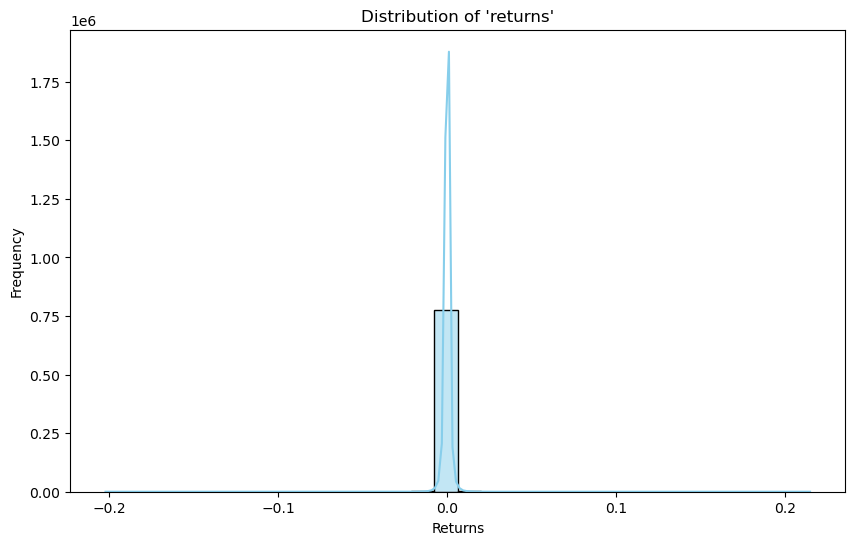

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(scaled_df['returns'], kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [97]:
# Use qcut to divide 'returns' into 11 equal-sized groups and label them from 1 to 11
scaled_df['return_group'] = pd.qcut(scaled_df['returns'], q=11, labels=range(1, 11 + 1))

# Display the DataFrame with the new 'return_group' column
scaled_df.groupby('return_group').size()

return_group
1     70992
2     70992
3     70991
4     70992
5     70991
6     70992
7     70991
8     70992
9     70991
10    70992
11    70992
dtype: int64

In [98]:
scaled_df.head()

,timestamp,returns,0,1,2,3,4,5,6,7,...,79,80,81,82,83,84,85,86,87,return_group
0,1.578819e+09,0.001872,-1.732049,-1.830281,-1.833462,-1.831519,-1.835651,-1.832957,-1.833252,-1.826220,...,-0.067931,0.001517,0.041273,-0.009124,0.006198,-0.002603,-1.251451,1.456663,-0.848201,11
1,1.578826e+09,-0.000358,-1.732044,-1.830538,-1.833490,-1.831526,-1.835634,-1.832957,-1.833252,-1.826513,...,-0.067931,0.001517,0.041273,-0.009124,0.006198,-0.002603,-1.240716,1.667355,-0.848201,4
2,1.578832e+09,0.003885,-1.732040,-1.830534,-1.833392,-1.831507,-1.835584,-1.832957,-1.833252,-1.826800,...,-0.067931,0.001517,0.041273,-0.009124,0.006198,-0.002603,-1.228034,1.880096,-0.848201,11
3,1.578839e+09,0.002807,-1.732035,-1.830361,-1.833209,-1.831468,-1.835547,-1.832957,-1.833252,-1.827082,...,-0.067931,0.001517,0.041273,-0.009124,0.006198,-0.002603,-1.150484,-1.472694,-0.848201,11
4,1.578841e+09,-0.003996,-1.732031,-1.830460,-1.833168,-1.831465,-1.835525,-1.832957,-1.833252,-1.827358,...,-0.067931,0.001517,0.041273,-0.009124,0.006198,-0.002603,-0.994479,-1.361747,-0.848201,1


In [99]:
from sklearn.model_selection import train_test_split

train_size = 0.8  # 80% for training and 20% for testing

split_index = int(len(scaled_df) * train_size)

train_df = scaled_df[:split_index]
test_df = scaled_df[split_index:]

X_train = train_df.drop(columns=['returns', 'return_group']).to_numpy()
y_train = train_df[['timestamp','return_group']].to_numpy()

X_test = test_df.drop(columns=['returns', 'return_group']).to_numpy()
y_test = test_df[['timestamp','return_group']].to_numpy()

In [100]:
# # Set print options for better readability
# np.set_printoptions(precision=2, suppress=True)

# # Pretty print the array
# print("Formatted NumPy Array:")
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

In [101]:
features.shape
# target.shape

(780908, 88)

In [102]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Use 'entropy' for cross-entropy as impurity
clf.fit(X_train[:, 1:], y_train[:, 1])

# Verify model training
print("Model trained successfully!")
print("Number of features:", clf.n_features_in_)
print("Tree depth:", clf.get_depth())


Model trained successfully!
Number of features: 88
Tree depth: 62


In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = clf.predict(X_test[:, 1:])

# Calculate accuracy
accuracy = accuracy_score(y_test[:, 1], y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test[:, 1], y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test[:, 1], y_pred)
# print("Classification Report:\n", class_report)

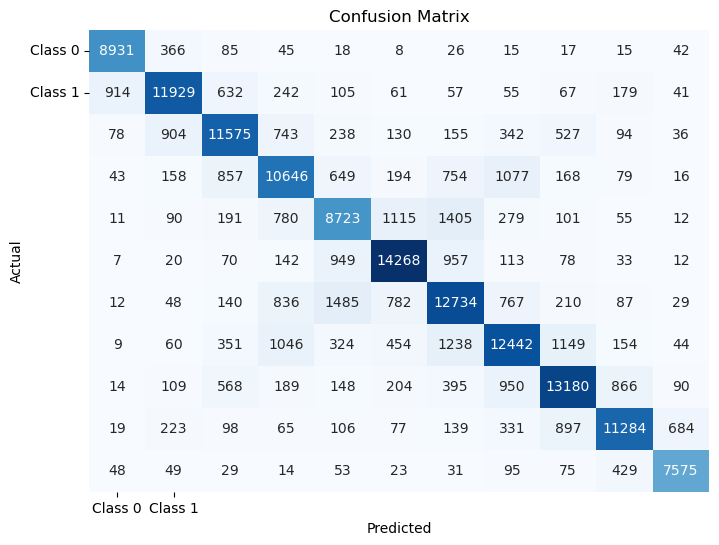

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


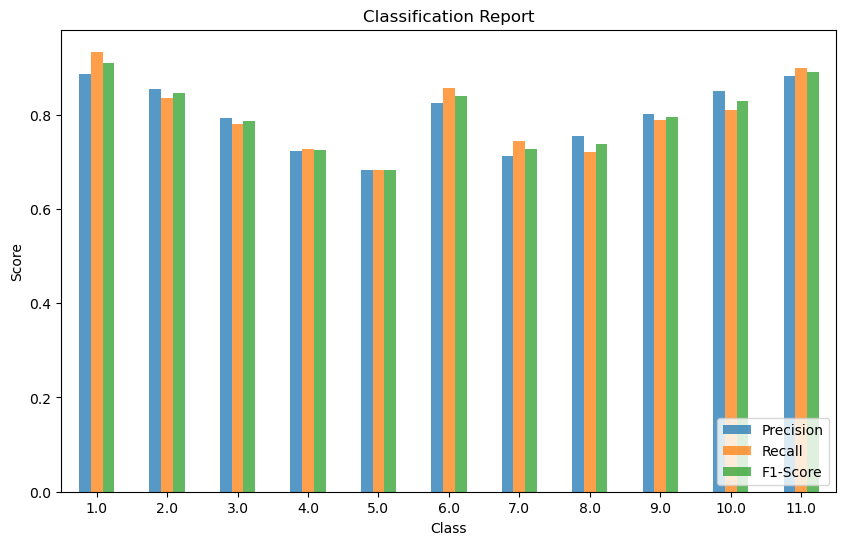

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test[:, 1], y_pred, output_dict=True)

# Extract precision, recall, f1-score for each class
class_labels = [key for key in class_report.keys() if key not in ('accuracy', 'macro avg', 'weighted avg')]  # Get only class labels
precision = [class_report[label]['precision'] for label in class_labels]
recall = [class_report[label]['recall'] for label in class_labels]
f1 = [class_report[label]['f1-score'] for label in class_labels]

# Create a DataFrame for the classification report
class_report_df = pd.DataFrame({
    'Class': class_labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Set the class as index
class_report_df.set_index('Class', inplace=True)

# Plot the classification report
plt.figure(figsize=(10, 6))
class_report_df.plot(kind='bar', alpha=0.75, ax=plt.gca())
plt.title("Classification Report")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


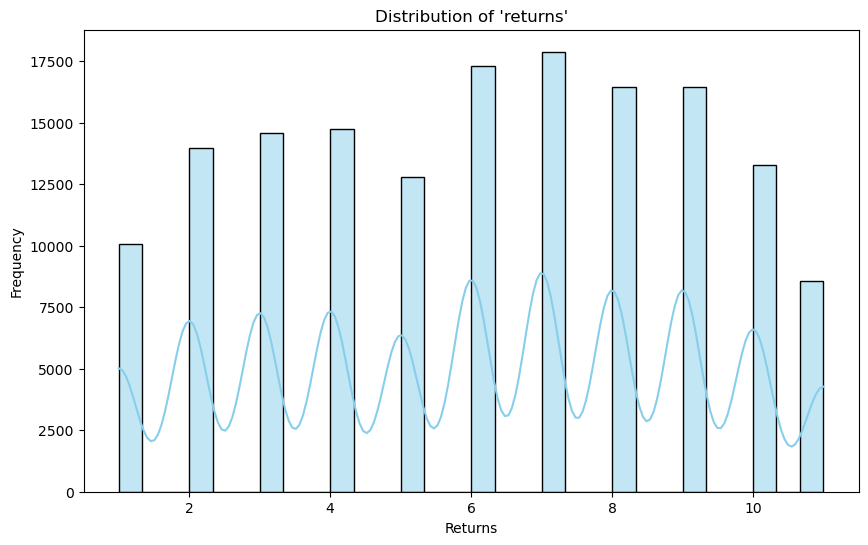

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [107]:
y_pred

array([ 3.,  5.,  4., ..., 11.,  9.,  9.])

In [108]:
y_test

array([[1.70e+09, 3.00e+00],
       [1.70e+09, 6.00e+00],
       [1.70e+09, 4.00e+00],
       ...,
       [1.73e+09, 1.10e+01],
       [1.73e+09, 9.00e+00],
       [1.73e+09, 9.00e+00]])

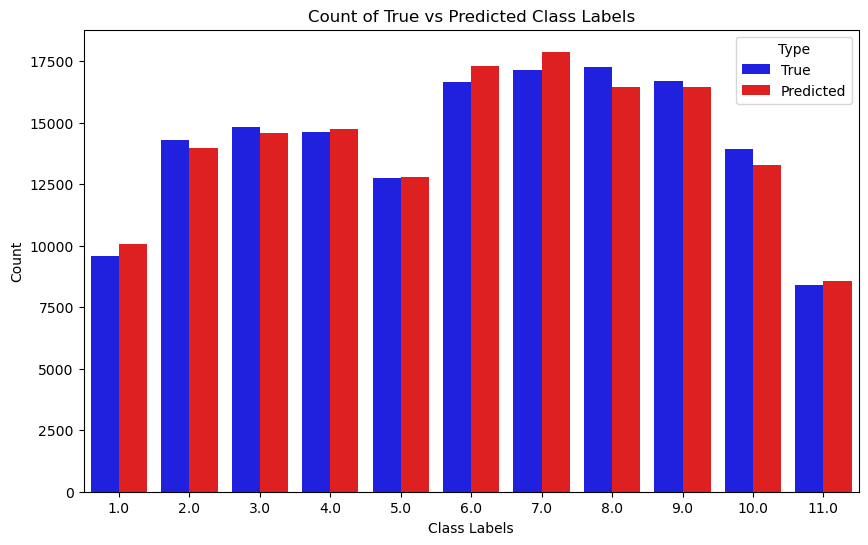

In [111]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for Seaborn
results_df = pd.DataFrame({
    'True': y_test[:, 1],   # Actual labels
    'Predicted': y_pred     # Predicted labels
})

# Melt the DataFrame for Seaborn
melted_results = results_df.melt(var_name='Type', value_name='Class')

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=melted_results, x='Class', hue='Type', palette=['blue', 'red'])
plt.title('Count of True vs Predicted Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

